In [2]:
import scanpy as sc
import pandas as pd

In [26]:
data = sc.read_10x_h5('data/lymph_node_lymphoma_14k_filtered_feature_bc_matrix.h5', gex_only=False)

/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [27]:
import pandas as pd
cell_meta = pd.read_csv("data/annotated_cell_types_lymphoma.csv", index_col="Barcode")
data.obs = data.obs.join(cell_meta, how="left")

In [28]:
RNA_data = data[:, data.var['feature_types'] == 'Gene Expression'].copy()
ATAC_data = data[:, data.var['feature_types'] == 'Peaks'].copy()

/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [29]:
RNA_data.layers["counts"] = RNA_data.X.copy()
ATAC_data.layers["counts"] = ATAC_data.X.copy()

sc.pp.normalize_total(RNA_data, target_sum=1e6)
sc.pp.log1p(RNA_data)
sc.pp.highly_variable_genes(RNA_data, n_top_genes=3000)
sc.pp.pca(RNA_data, n_comps=50)
sc.pp.neighbors(RNA_data, n_neighbors=15, use_rep='X_pca')

In [30]:
sc.tl.umap(RNA_data, random_state=22)
sc.tl.leiden(RNA_data, flavor="igraph", n_iterations=2, resolution=1, key_added="leiden_1")

In [29]:
sc.tl.leiden(RNA_data, flavor="igraph", n_iterations=2, resolution=2, key_added="leiden_2")

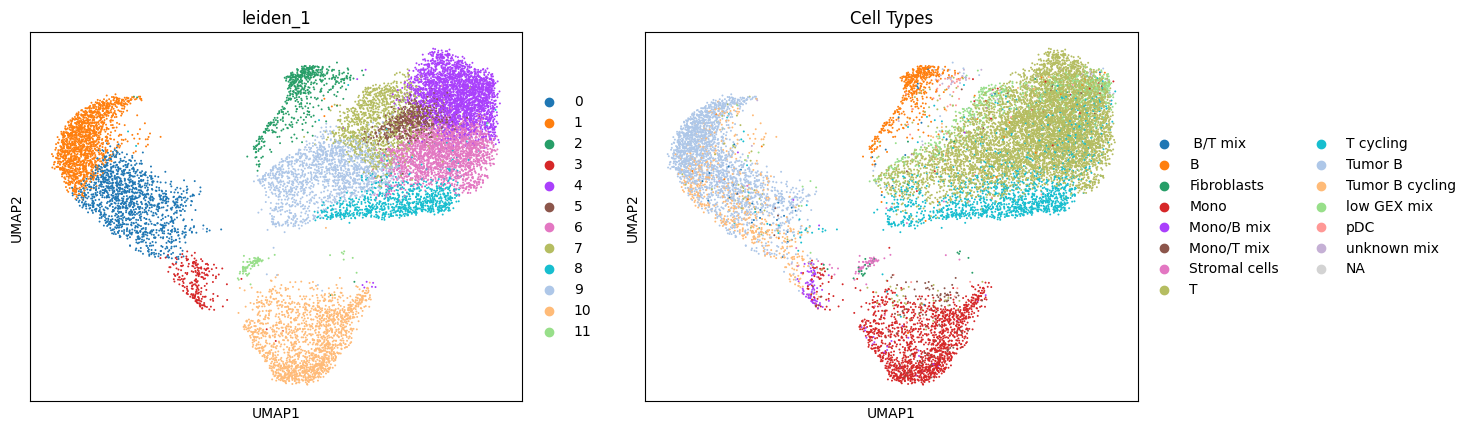

In [31]:
sc.pl.umap(RNA_data, color=["leiden_1", "Cell Types"], size=8)

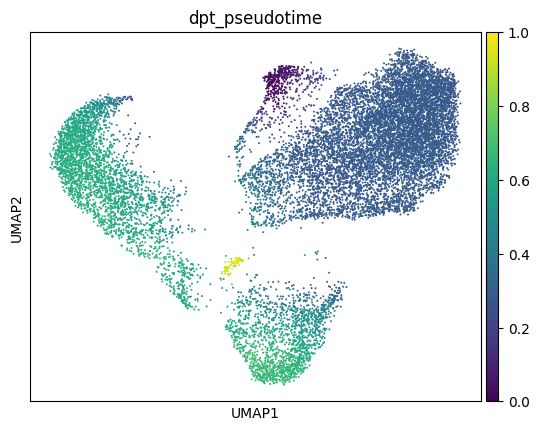

In [32]:
root_cell = RNA_data.obs[RNA_data.obs['Cell Types'] == 'B'].index[0]

# Set the root cell index in the .uns dictionary
RNA_data.uns['iroot'] = RNA_data.obs_names.get_loc(root_cell)

# Compute diffusion map and DPT pseudotime
sc.tl.diffmap(RNA_data)
sc.tl.dpt(RNA_data)

# Visualize pseudotime on UMAP
sc.pl.umap(RNA_data, color='dpt_pseudotime', color_map='viridis')

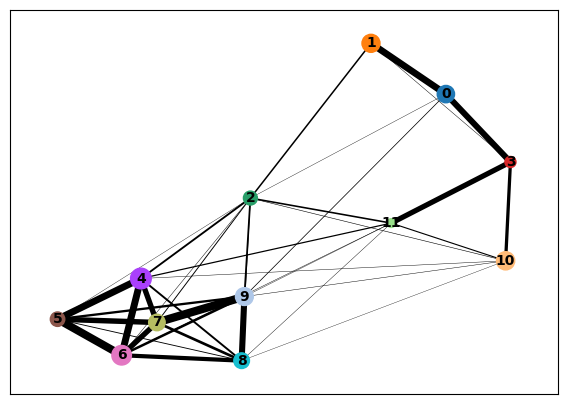

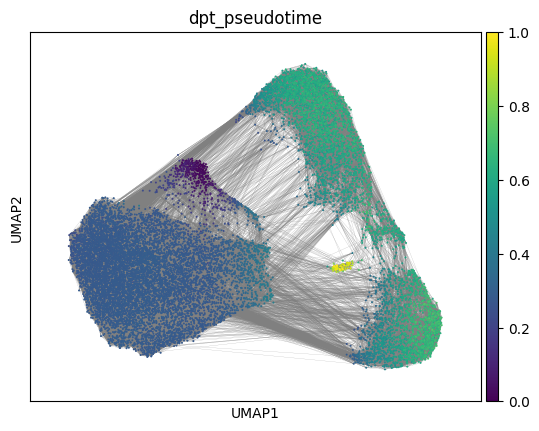

In [36]:
sc.tl.paga(RNA_data, groups='leiden_1')
# Now plot PAGA graph overlaid on UMAP
sc.pl.paga(RNA_data, color='leiden_1', threshold=0.03, show=True)

sc.tl.umap(RNA_data, init_pos='paga')

# Plot UMAP with PAGA edges
sc.pl.umap(RNA_data, color='dpt_pseudotime', edges=True, show=True)

In [ ]:
RNA_data = sc.read_mtx('data/cardiac/GSE263326_seurat_RNA_counts.mtx.gz')
ATAC_data = sc.read_mtx('data/cardiac/GSE263326_seurat_ATAC_counts.mtx.gz')
RNA_data = RNA_data.transpose()
ATAC_data = ATAC_data.transpose()
genes = pd.read_csv('data/cardiac/GSE263326_genes_rownamesRNA.csv', sep='\t', header=None)
peaks = pd.read_csv('data/cardiac/GSE263326_genomicregions_rownamesATAC.csv', sep='\t', header=None)
barcodes = pd.read_csv('data/cardiac/GSE263326_barcodes_colnames.csv', sep='\t', header=None)
metadata = pd.read_csv('data/cardiac/GSE263326_metadata.csv', index_col=0)

In [4]:
RNA_data.obs_names = barcodes[0].values
RNA_data.var_names = genes[0].values
ATAC_data.obs_names = barcodes[0].values
ATAC_data.var_names = peaks[0].values
RNA_data.obs = pd.concat([RNA_data.obs, metadata.loc[RNA_data.obs_names]], axis=1)
ATAC_data.obs = pd.concat([ATAC_data.obs, metadata.loc[ATAC_data.obs_names]], axis=1)

In [5]:
RNA_data.layers["counts"] = RNA_data.X.copy()
ATAC_data.layers["counts"] = ATAC_data.X.copy()

sc.pp.normalize_total(RNA_data, target_sum=1e6)
sc.pp.log1p(RNA_data)
sc.pp.highly_variable_genes(RNA_data, n_top_genes=3000)
sc.pp.pca(RNA_data, n_comps=50)
sc.pp.neighbors(RNA_data, n_neighbors=15, use_rep='X_pca')

In [6]:
sc.tl.umap(RNA_data, random_state=22)
sc.tl.leiden(RNA_data, flavor="igraph", n_iterations=2, resolution=1, key_added="leiden_1")

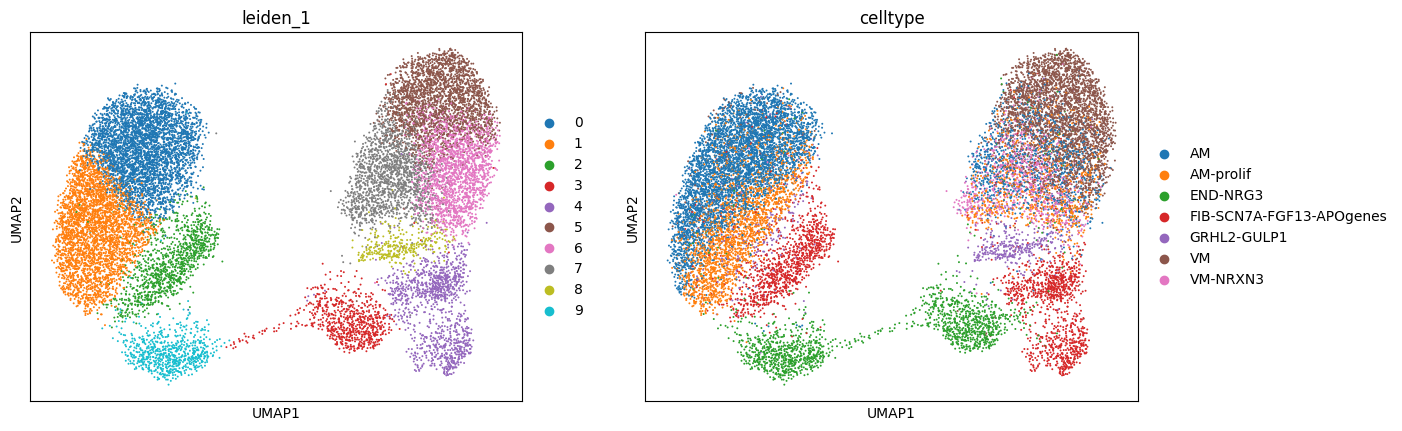

In [7]:
sc.pl.umap(RNA_data, color=["leiden_1", "celltype"], size=8)

In [8]:
adata = RNA_data.copy()

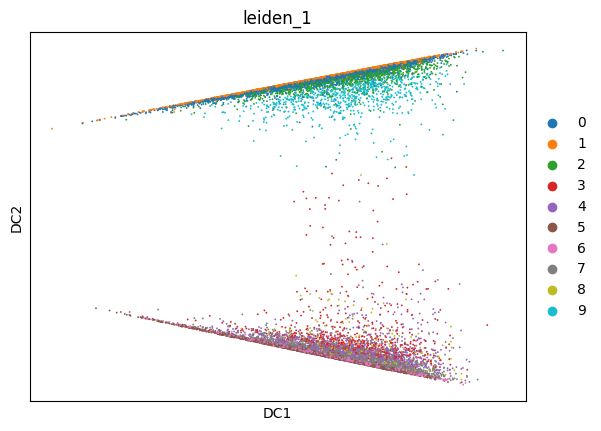

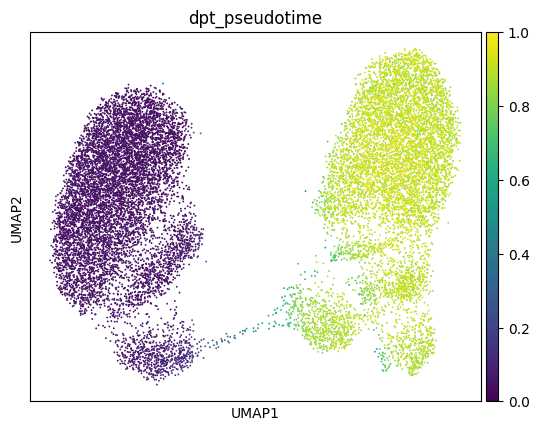

In [ ]:
# 2. Compute DPT (Diffusion Pseudotime)
# Choose a "root cell" (e.g. a stem cell cluster or an early-stage cell)
# You can set it manually using adata.obs_names or automatically from a cluster

# Example: use the first cell in cluster '0' as the root

# Pick a root cell – e.g., the first cell from an early cluster like cluster '0'
root_cell = adata.obs[adata.obs['leiden_1'] == '0'].index[0]

# Set the root cell index in the .uns dictionary
adata.uns['iroot'] = adata.obs_names.get_loc(root_cell)

# Compute diffusion map and DPT pseudotime
sc.tl.diffmap(adata)
sc.tl.dpt(adata)

# Visualize pseudotime on UMAP
sc.pl.umap(adata, color='dpt_pseudotime', color_map='viridis')

In [14]:
brain_data = sc.read_10x_h5('data/e18_mouse_brain_fresh_5k_filtered_feature_bc_matrix.h5', gex_only=False)

/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [17]:
RNA_data_brain = brain_data[:, brain_data.var['feature_types'] == 'Gene Expression'].copy()
ATAC_data_brain = brain_data[:, brain_data.var['feature_types'] == 'Peaks'].copy()
RNA_data_brain.layers["counts"] = RNA_data_brain.X.copy()
ATAC_data_brain.layers["counts"] = ATAC_data_brain.X.copy()


/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


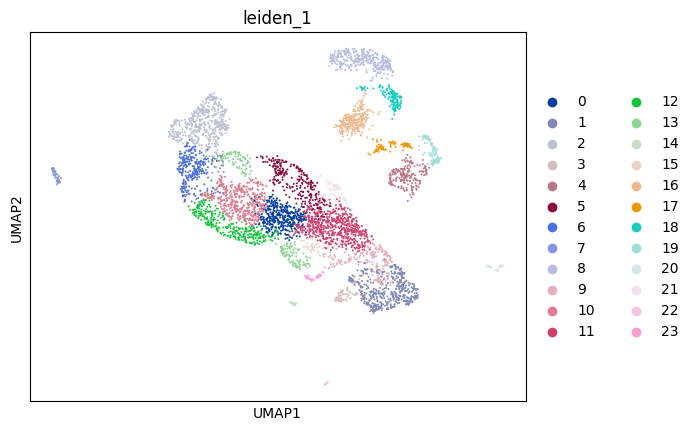

In [18]:
sc.pp.normalize_total(RNA_data_brain, target_sum=1e6)
sc.pp.log1p(RNA_data_brain)
sc.pp.highly_variable_genes(RNA_data_brain, n_top_genes=3000)
sc.pp.pca(RNA_data_brain, n_comps=50)
sc.pp.neighbors(RNA_data_brain, n_neighbors=15, use_rep='X_pca')
sc.tl.umap(RNA_data_brain, random_state=99)
sc.tl.leiden(RNA_data_brain, flavor="igraph", n_iterations=2, resolution=1, key_added="leiden_1")
sc.pl.umap(RNA_data_brain, color="leiden_1", size=8)

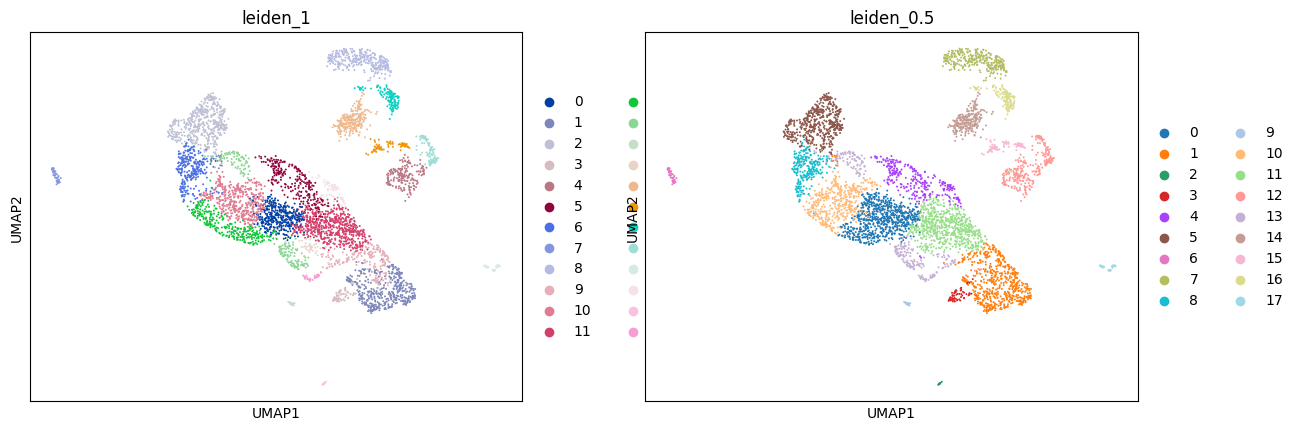

In [20]:
sc.tl.leiden(RNA_data_brain, flavor="igraph", n_iterations=2, resolution=0.5, key_added="leiden_0.5")
sc.pl.umap(RNA_data_brain, color=["leiden_1", "leiden_0.5"], size=8)

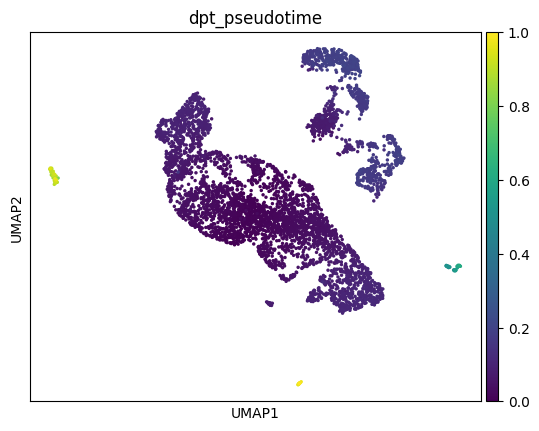

In [24]:
root_cell = RNA_data_brain.obs[RNA_data_brain.obs['leiden_0.5'] == '0'].index[0]

# Set the root cell index in the .uns dictionary
RNA_data_brain.uns['iroot'] = RNA_data_brain.obs_names.get_loc(root_cell)

# Compute diffusion map and DPT pseudotime
sc.tl.diffmap(RNA_data_brain)
sc.tl.dpt(RNA_data_brain)

# Visualize pseudotime on UMAP
sc.pl.umap(RNA_data_brain, color='dpt_pseudotime', color_map='viridis')

In [25]:
RNA_data_brain.obs['dpt_pseudotime']

AAACAGCCAACCGCCA-1    0.000000
AAACAGCCAAGGTCGA-1    0.111977
AAACAGCCAGGAACAT-1    0.045829
AAACAGCCATATTGAC-1    0.099422
AAACAGCCATCAGCAC-1    0.905645
                        ...   
TTTGTGGCATTTGCTC-1    0.012900
TTTGTGTTCAATGACC-1    0.059356
TTTGTTGGTAGACAAA-1    0.195806
TTTGTTGGTGGAGCAA-1    0.052282
TTTGTTGGTTAGAGCC-1    0.032454
Name: dpt_pseudotime, Length: 4881, dtype: float32